In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix


import seaborn as sns

In [2]:
df = pd.read_csv('laptop_prices.csv')

In [3]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [5]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [18]:
# Remove non-numeric data by converting the DataFrame to numeric values where possible, and set errors='coerce' to handle strings
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns where all values are NaN after the conversion
df_numeric_cleaned = df.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Display the cleaned DataFrame
df_numeric_cleaned.head()


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0


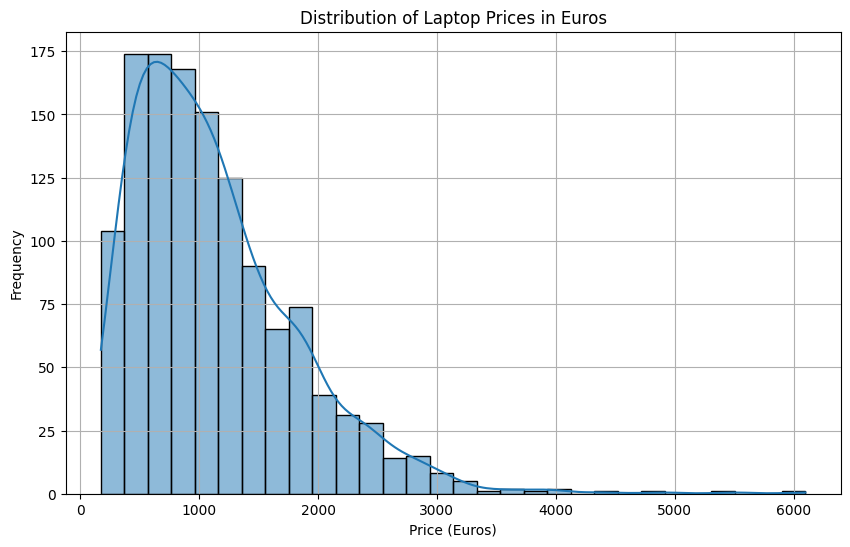

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_numeric_cleaned['Price_euros'], kde=True, bins=30)
plt.title('Distribution of Laptop Prices in Euros')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

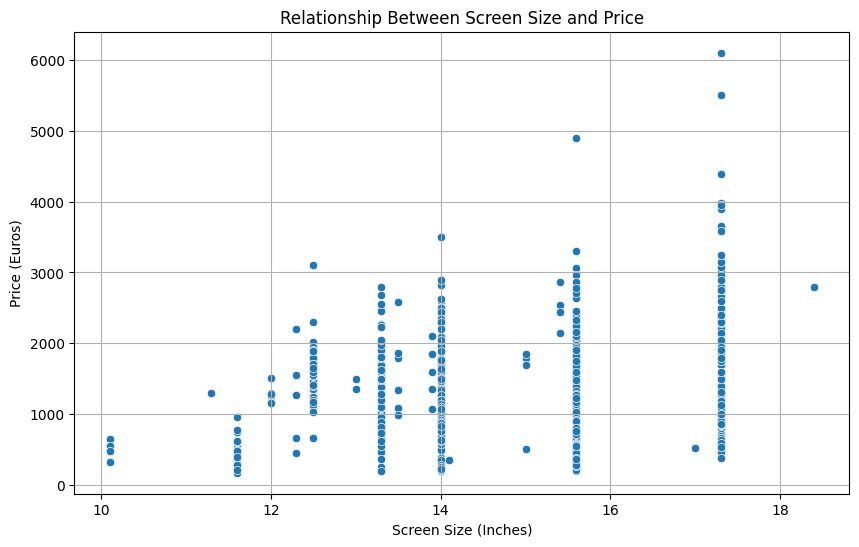

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=df_numeric_cleaned)
plt.title('Relationship Between Screen Size and Price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.show()

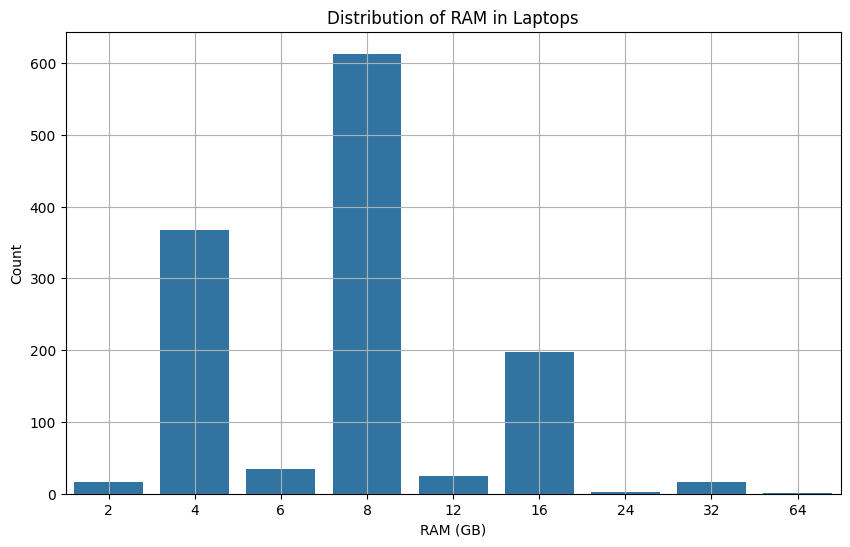

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ram', data=df_numeric_cleaned)
plt.title('Distribution of RAM in Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.grid(True)
plt.show()